# Parte 2: Exportación de datos

En este cuaderno nos enfocaremos en analizar los datos de entrada para COSIPY. Usaremos la librería `xarray` para abrir datos en formato netCDF.

```{note}
Antes de ejecutar este cuaderno, asegúrate de que el kernel de Jupyter (esquina superior izquierda del cuaderno) esté configurado para trabajar con el entorno `cosipy` de conda.
```

In [1]:
import xarray as xr

In [2]:
# Leyendo el archivo netCDF
ds = xr.open_dataset('cosipy/data/input/Taller/Chuecon_ERA5.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 34, lon: 34, time: 1464)
Coordinates:
  * lon      (lon) float64 -76.08 -76.08 -76.07 -76.07 ... -76.05 -76.05 -76.05
  * lat      (lat) float64 -11.95 -11.95 -11.95 -11.95 ... -11.92 -11.92 -11.92
  * time     (time) datetime64[ns] 2020-01-01 ... 2020-12-31T18:00:00
Data variables:
    HGT      (lat, lon) float32 ...
    ASPECT   (lat, lon) float32 ...
    SLOPE    (lat, lon) float32 ...
    MASK     (lat, lon) float32 ...
    T2       (time, lat, lon) float64 ...
    RH2      (time, lat, lon) float64 ...
    U2       (time, lat, lon) float64 ...
    G        (time, lat, lon) float64 ...
    PRES     (time, lat, lon) float64 ...
    RRR      (time, lat, lon) float64 ...
    N        (time, lat, lon) float64 ...

## Temperatura

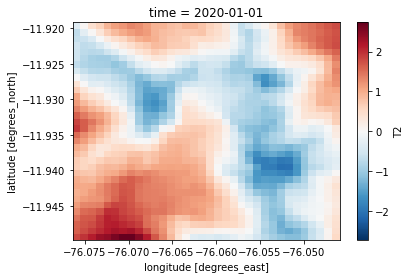

In [3]:
# Visualizando la variable temperatura para un tiempo determinado
(ds['T2'][0]-273.16).plot()

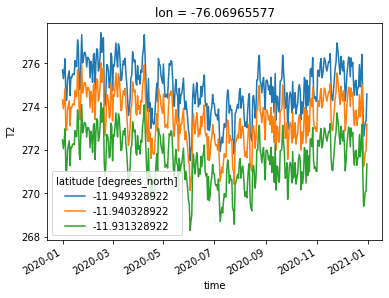

In [4]:
# Visualizando la temperatura en diferentes localizaciones y promediando diariamente
ds['T2'].isel(lon=7, lat=[0, 10, 20]).resample(time='1D').mean().plot.line(x="time")

## Precipitación

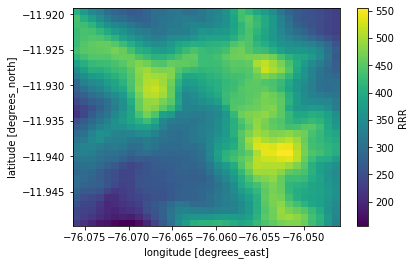

In [5]:
# Visualizando la precipitación anual
ds['RRR'].sum('time').plot()

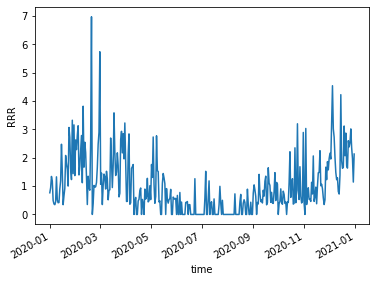

In [6]:
# Visualizando la precipitación diaria para todo el domino
ds['RRR'].mean(('lat', 'lon')).resample(time='1D').sum().plot()

## ¿Qué otras variables podemos observar?